In [1]:
import numpy as np
import pandas as pd
import os
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
import mlflow
import mlflow.sklearn

In [2]:
df = pd.read_csv(r"E:\DATA SCIENCE & AI\DATASET\youtube_comment_analysis\final_processed_df.csv")

In [3]:
df

,clean_comment,category
0,family mormon never tried explain still stare ...,1
1,buddhism much lot compatible christianity espe...,1
2,seriously say thing first get complex explain ...,-1
3,learned want teach different focus goal not wr...,0
4,benefit may want read living buddha living chr...,1
...,...,...
36788,jesus,0
36789,kya bhai pure saal chutiya banaya modi aur jab...,1
36790,downvote karna tha par upvote hogaya,0
36791,haha nice,1


### **Setup for experiment tracking:**

In [15]:
import dagshub
dagshub.init(repo_owner='Pravat-21', repo_name='ML-Project-YouTube-Comment-Analysis', mlflow=True)
mlflow.set_tracking_uri("https://dagshub.com/Pravat-21/ML-Project-YouTube-Comment-Analysis.mlflow")

Accessing as Pravat-21

Initialized MLflow to track repo "Pravat-21/ML-Project-YouTube-Comment-Analysis"

Repository Pravat-21/ML-Project-YouTube-Comment-Analysis initialized!

In [16]:
mlflow.set_experiment("Exp-3: BoW VS TFIDF")

2025/11/03 21:18:28 INFO mlflow.tracking.fluent: Experiment with name 'Exp-3: BoW VS TFIDF' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/0dd9845890224c60857b8ac7fd3ef72b', creation_time=1762184907915, experiment_id='2', last_update_time=1762184907915, lifecycle_stage='active', name='Exp-3: BoW VS TFIDF', tags={}>

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [5]:
df.isnull().sum()

clean_comment    131
category           0
dtype: int64

In [9]:
df[df.isnull().any(axis=1)]


,clean_comment,category
287,NaN,0
821,NaN,0
922,NaN,0
934,NaN,0
1169,NaN,0
...,...,...
36358,NaN,0
36563,NaN,0
36599,NaN,0
36731,NaN,0


In [11]:
df.dropna(subset=['clean_comment'],inplace=True)

In [12]:
df.isnull().sum()

clean_comment    0
category         0
dtype: int64

In [13]:
df.shape

(36662, 2)

2025/11/03 21:19:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run BoW-(1, 1)-RandomForest at: https://dagshub.com/Pravat-21/ML-Project-YouTube-Comment-Analysis.mlflow/#/experiments/2/runs/b2a5894546aa4f5cb103ecac8110b0ed
🧪 View experiment at: https://dagshub.com/Pravat-21/ML-Project-YouTube-Comment-Analysis.mlflow/#/experiments/2


2025/11/03 21:19:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run TF-IDF-(1, 1)-RandomForest at: https://dagshub.com/Pravat-21/ML-Project-YouTube-Comment-Analysis.mlflow/#/experiments/2/runs/bd1e1a6207c44655961105da62698cf9
🧪 View experiment at: https://dagshub.com/Pravat-21/ML-Project-YouTube-Comment-Analysis.mlflow/#/experiments/2


2025/11/03 21:20:33 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run BoW-(1, 2)-RandomForest at: https://dagshub.com/Pravat-21/ML-Project-YouTube-Comment-Analysis.mlflow/#/experiments/2/runs/493720cb29f048d5ac5fa6a59dbabb37
🧪 View experiment at: https://dagshub.com/Pravat-21/ML-Project-YouTube-Comment-Analysis.mlflow/#/experiments/2


2025/11/03 21:21:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run TF-IDF-(1, 2)-RandomForest at: https://dagshub.com/Pravat-21/ML-Project-YouTube-Comment-Analysis.mlflow/#/experiments/2/runs/101dfde321874c939f0167f915858f7d
🧪 View experiment at: https://dagshub.com/Pravat-21/ML-Project-YouTube-Comment-Analysis.mlflow/#/experiments/2


2025/11/03 21:22:09 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run BoW-(1, 3)-RandomForest at: https://dagshub.com/Pravat-21/ML-Project-YouTube-Comment-Analysis.mlflow/#/experiments/2/runs/e128826288fe4058be317e4dc48c432f
🧪 View experiment at: https://dagshub.com/Pravat-21/ML-Project-YouTube-Comment-Analysis.mlflow/#/experiments/2


2025/11/03 21:23:10 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run TF-IDF-(1, 3)-RandomForest at: https://dagshub.com/Pravat-21/ML-Project-YouTube-Comment-Analysis.mlflow/#/experiments/2/runs/65c77029e2314ea18b9abe4edd61a4c1
🧪 View experiment at: https://dagshub.com/Pravat-21/ML-Project-YouTube-Comment-Analysis.mlflow/#/experiments/2


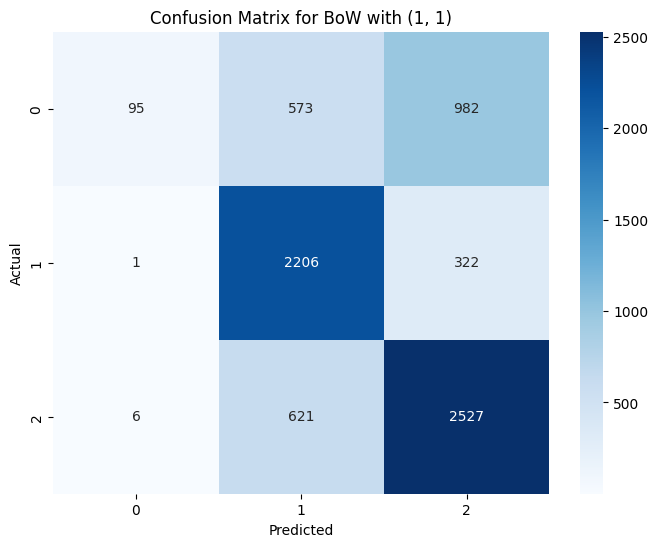

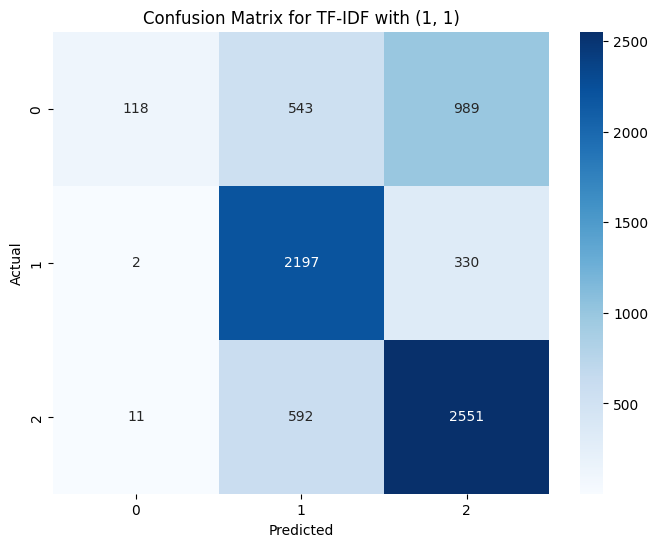

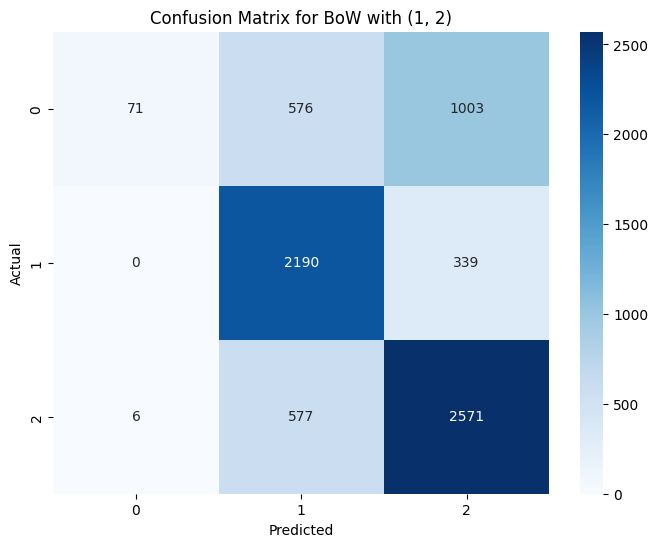

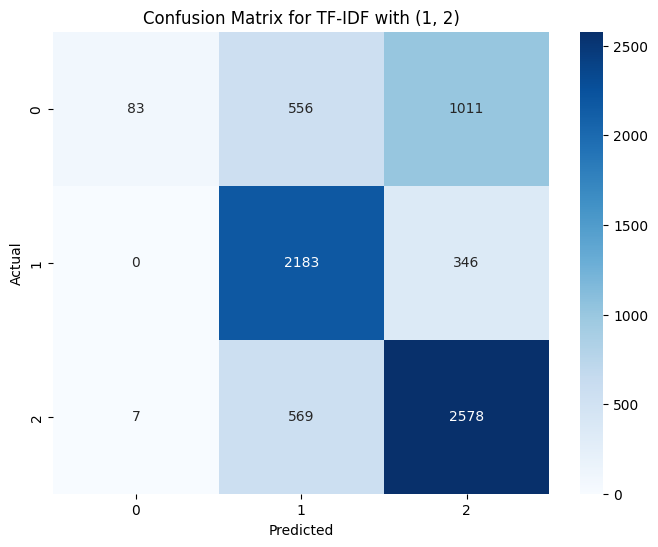

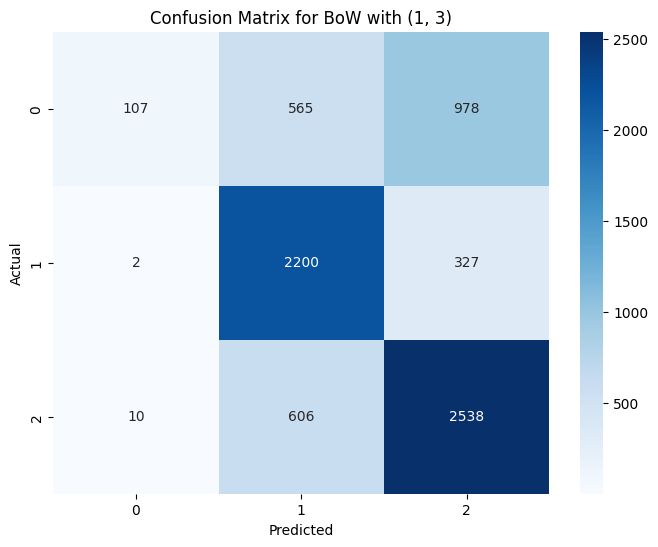

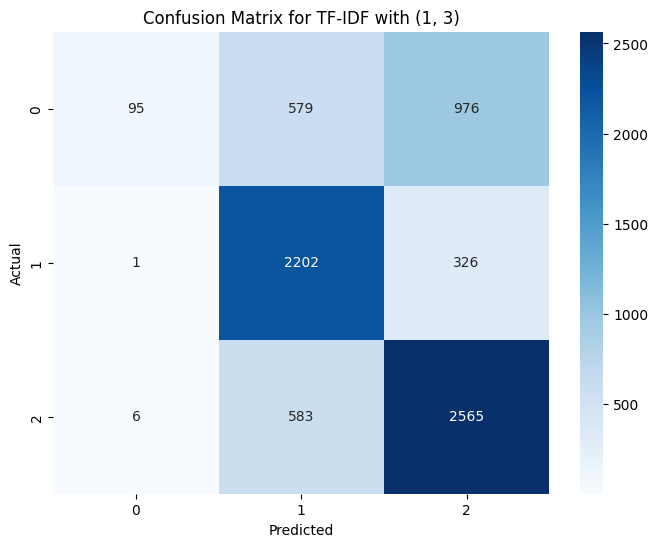

In [17]:
def run_experiment(vectorizer_type, ngram_range, vectorizer_max_features, vectorizer_name):

    #=====================================================================================================

    if vectorizer_type == "BoW":
        vectorizer = CountVectorizer(ngram_range=ngram_range,max_features= vectorizer_max_features)
    else:
        vectorizer = TfidfVectorizer(ngram_range=ngram_range,max_features= vectorizer_max_features)

    #=====================================================================================================

    X = vectorizer.fit_transform(df['clean_comment'])
    y= df["category"]
    #=====================================================================================================

    X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=42,test_size=0.2,stratify=y)

    with mlflow.start_run() as run:

        mlflow.set_tag("mlflow.runName", f"{vectorizer_name}-{ngram_range}-RandomForest")
        mlflow.set_tags(
		{

            "experiment_type":"Experiment-2",
            "model_type":"RandomForestClassifier",
            "Description":"selecting the best method between BoW & TFIDF"
        }
        )

        n_estimators=150
        max_depth=20


        mlflow.log_params({
        "vectorizer_type":f"{vectorizer_type}",
        "Vectorizer_max_feature":vectorizer.max_features,
        "max_depth":max_depth
        })

        model=RandomForestClassifier(n_estimators=n_estimators,max_depth=max_depth,random_state=42)
        model.fit(X_train,y_train)

        y_pred=model.predict(X_test)
        
        accuracy=accuracy_score(y_test,y_pred)
        
        mlflow.log_metric("accuracy",accuracy)
        
        

        class_rep = classification_report(y_test,y_pred,output_dict=True)
        
        for label, metrics in class_rep.items():
            if isinstance(metrics, dict):  # for precision, recall, f1-score
                for metric, value in metrics.items():
                    mlflow.log_metric(f"{label}_{metric}", value)
                    
        con_matrix = confusion_matrix(y_test,y_pred)
        
        plt.figure(figsize=(8,6))
        sns.heatmap(con_matrix,annot=True, fmt="d",cmap="Blues")
        plt.title(f"Confusion Matrix for {vectorizer_name} with {ngram_range}")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")

        plt.savefig(f"{vectorizer_name}_confusion_matrix_02.png")
        
        mlflow.log_artifact(f"{vectorizer_name}_confusion_matrix_02.png")
        
        mlflow.sklearn.log_model(model, f"Random_Forest_classifier_{vectorizer_name}_{ngram_range}")


#======================================================================================================
ngram_ranges=[(1,1),(1,2),(1,3)]
max_features=5000


for ngram_range in ngram_ranges:

    run_experiment("BoW", ngram_range, max_features, vectorizer_name= "BoW")
    run_experiment("TF-IDF", ngram_range, max_features, vectorizer_name= "TF-IDF")
